In [288]:
import scipy as sp
from scipy import signal
from scipy.signal import periodogram
import numpy as np
from numpy.fft import fft, fftfreq
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

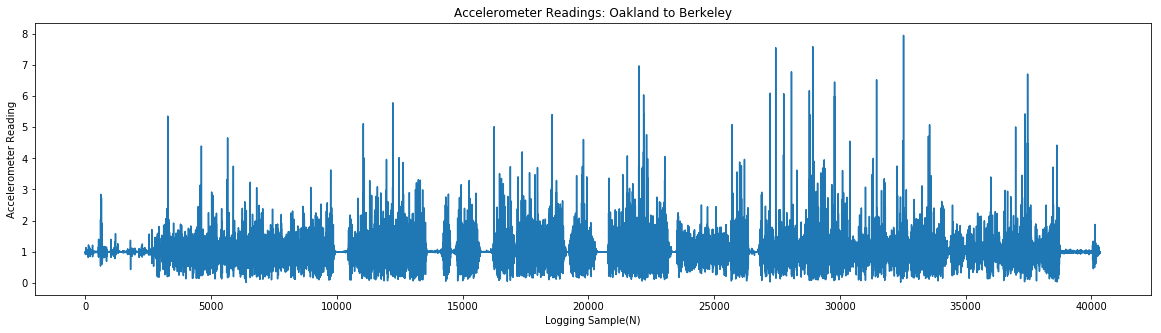

In [177]:
# BASIC PLOT OF RIDE 1
df1 = pd.read_csv("bikedata_morning_09202018_ACCELEROMETER.csv")
x1 = [i for i in range(len(df1['loggingSample(N)']))]
y1 = [i for i in df1['TOTAL_ACCELERATION']]
plt.figure(figsize=(20,5))
plt.title('Accelerometer Readings: Oakland to Berkeley')
plt.xlabel('Logging Sample(N)')
plt.ylabel('Accelerometer Reading')
plt.plot(x1, y1)

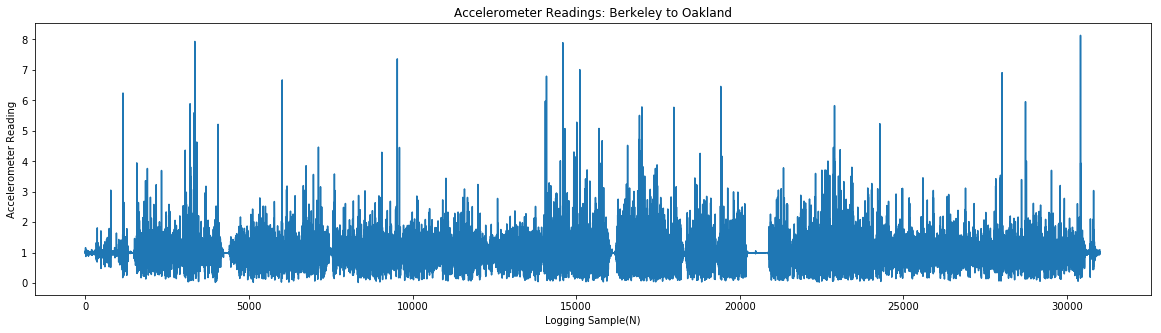

In [178]:
# BASIC PLOT OF RIDE 2
df2 = pd.read_csv("bikedata_evening_09202018_ACCELEROMETER.csv")
x2 = [i for i in range(len(df2['loggingSample(N)']))]
y2 = [i for i in df2['TOTAL_ACCELERATION']]
plt.figure(figsize=(20,5))
plt.title('Accelerometer Readings: Berkeley to Oakland')
plt.xlabel('Logging Sample(N)')
plt.ylabel('Accelerometer Reading')
plt.plot(x2, y2)

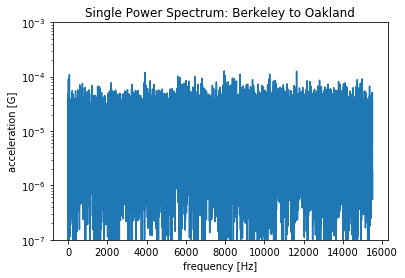

In [339]:
# USE PERIODGRAM METHOD TO CALCULATE SINGLE POWER SPECTRUM FOR ENTIRE RIDE 2
# referencing scipy.signal.periodogram documentation
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.periodogram.html

#  also referenced: # https://www.programcreek.com/python/example/100530/scipy.signal.periodogram
df2 = pd.read_csv("bikedata_evening_09202018_ACCELEROMETER.csv")
x = len(df2['loggingSample(N)'])

f, Pxx_den = signal.periodogram(y2,x)

plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e-3])
plt.title('Single Power Spectrum: Berkeley to Oakland')
plt.xlabel('frequency [Hz]')
plt.ylabel('acceleration [G]')
plt.show()

In [242]:
# SPLITTING EVENING RIDE DATASET INTO SEGMENTS
# segment 1 = campus riding (start : Hillegass Ave & Stuart St)
# segment 2 = Berkeley riding (Hillegass Ave & Stuart St : Broadway & 27th st)
# segment 3 = Oakland riding (Broadway & 27th st : home)
seg1 = pd.read_csv("bikedata_evening_segment1.csv")
seg2 = pd.read_csv("bikedata_evening_segment2.csv")
seg3 = pd.read_csv("bikedata_evening_segment3.csv")

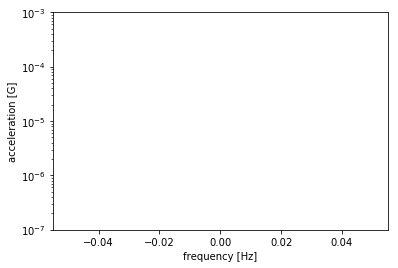

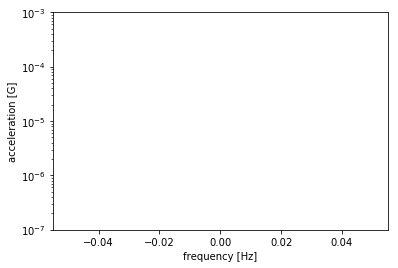

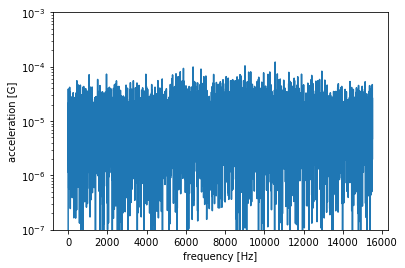

In [285]:
# USE PERIODGRAM METHOD TO CALCULATE SINGLE POWER SPECTRUM FOR THREE SEGMENTS
split_x1 = len(seg1['loggingSample(N)'])
split_x2 = len(seg2['loggingSample(N)'])
split_x3 = len(seg3['loggingSample(N)'])

split_y1 = [i for i in seg1['TOTAL_ACCELERATION']] 
split_y2 = [i for i in seg2['TOTAL_ACCELERATION']] 
split_y3 = [i for i in seg3['TOTAL_ACCELERATION']]

f1, Pxx_den1 = signal.periodogram(split_y1,x)
f2, Pxx_den2 = signal.periodogram(split_y2,x)
f3, Pxx_den3 = signal.periodogram(split_y3,x)
# cannot figure out why Pxx_den1 and Pxx_den2 are returning nan values, but Pxx_den3 return values, as expected 
# print(Pxx_den1)
# print(Pxx_den2)
# print(Pxx_den3)

# periodogram for segment 1
plt.semilogy(f1, Pxx_den1)
plt.ylim([1e-7, 1e-3])
plt.xlabel('frequency [Hz]')
plt.ylabel('acceleration [G]')
plt.show()

# periodogram for segment 2
plt.semilogy(f2, Pxx_den2)
plt.ylim([1e-7, 1e-3])
plt.xlabel('frequency [Hz]')
plt.ylabel('acceleration [G]')
plt.show()

# periodogram for segment 3
plt.semilogy(f3, Pxx_den3)
plt.ylim([1e-7, 1e-3])
plt.xlabel('frequency [Hz]')
plt.ylabel('acceleration [G]')
plt.show()

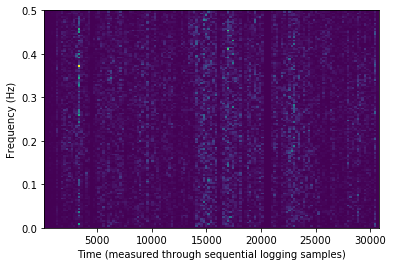

In [340]:
# SPECTROGRAM FOR ENTIRE RIDE 2
# ride 2 data

spect_df = pd.read_csv("bikedata_evening_09202018_ACCELEROMETER.csv")
spect_y = np.array([i for i in spect_df['TOTAL_ACCELERATION']])

f, t, Sxx = signal.spectrogram(spect_y)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (measured through sequential logging samples)')
plt.show()